In [988]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [989]:
data = pd.read_csv("car_prices.csv")
data

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25 23:02:01.648422
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25 23:02:01.648425
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426
...,...,...,...,...,...,...,...,...
9995,Honda,Altima,2017,25154,43139,red,FL,2023-10-07 23:02:01.650165
9996,Chevrolet,Accord,2017,68264,15632,white,TX,2024-01-05 23:02:01.650166
9997,Nissan,Cruze,2016,17417,30832,silver,IL,2023-03-29 23:02:01.650168
9998,Honda,Accord,2011,68878,10801,blue,TX,2023-05-02 23:02:01.650170


In [990]:
data.shape

(10000, 8)

In [991]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   make     10000 non-null  object
 1   model    10000 non-null  object
 2   year     10000 non-null  int64 
 3   mileage  10000 non-null  int64 
 4   price    10000 non-null  int64 
 5   color    10000 non-null  object
 6   state    10000 non-null  object
 7   date     10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [992]:
data["color"].value_counts()

silver    2190
red       2050
white     1940
blue      1920
black     1900
Name: color, dtype: int64

In [993]:
car_color = data["color"].value_counts()
car_color

silver    2190
red       2050
white     1940
blue      1920
black     1900
Name: color, dtype: int64

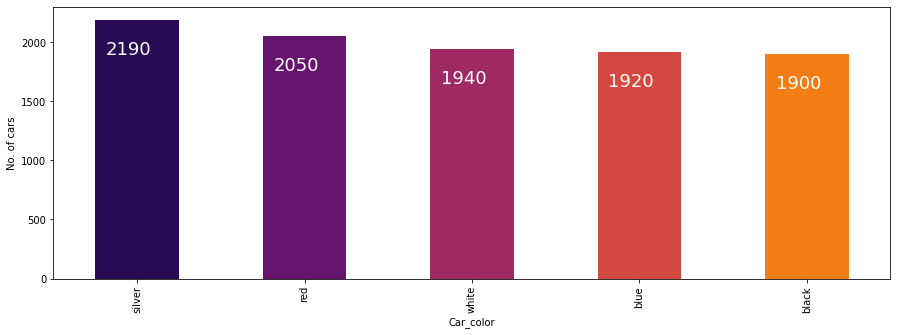

In [994]:
color = sns.color_palette("inferno")
car_color1 = car_color.plot(kind="bar", x = "color", figsize=(15, 5), color = color)
plt.xlabel("Car_color")
plt.ylabel("No. of cars")

for i in car_color1.patches:
    car_color1.annotate(f'\n{i.get_height()}', (i.get_x()+0.2, i.get_height()), ha = "center", va = "top", size = 18, color = "white")


In [995]:
data["state"].value_counts()

CA    2140
TX    2080
FL    2030
NY    2000
IL    1750
Name: state, dtype: int64

In [996]:
state_count = data["state"].value_counts()
state_count

CA    2140
TX    2080
FL    2030
NY    2000
IL    1750
Name: state, dtype: int64

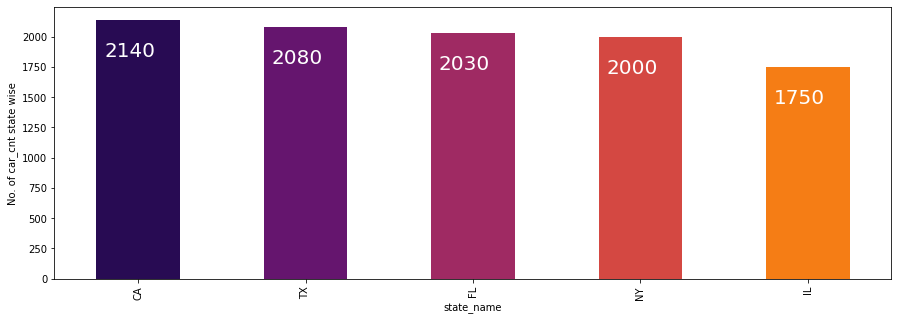

In [997]:
color = sns.color_palette("inferno")
state_col = state_count.plot(kind = "bar", x = "state", figsize=(15, 5), color = color)
plt.xlabel("state_name")
plt.ylabel("No. of car_cnt state wise")

for i in state_col.patches:
    state_col.annotate(f'\n{i.get_height()}', (i.get_x()+0.2, i.get_height()), ha = "center", va = "top", size = 20, color = "white")

In [998]:
data.head()

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25 23:02:01.648422
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25 23:02:01.648425
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426


In [999]:
data["date"] = pd.to_datetime(data["date"])

In [1000]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   make     10000 non-null  object        
 1   model    10000 non-null  object        
 2   year     10000 non-null  int64         
 3   mileage  10000 non-null  int64         
 4   price    10000 non-null  int64         
 5   color    10000 non-null  object        
 6   state    10000 non-null  object        
 7   date     10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 625.1+ KB


In [1001]:
data.head(1)

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970


In [1002]:
data["date"] = data["date"].dt.date

In [1003]:
data.head()

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14


In [1004]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   make     10000 non-null  object
 1   model    10000 non-null  object
 2   year     10000 non-null  int64 
 3   mileage  10000 non-null  int64 
 4   price    10000 non-null  int64 
 5   color    10000 non-null  object
 6   state    10000 non-null  object
 7   date     10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [1005]:
data["date"] = pd.to_datetime(data["date"])

In [1006]:
data["day"] = data["date"].dt.day

In [1007]:
data["month"] = data["date"].dt.month

In [1008]:
data["year"] = data["date"].dt.year  #Already year column is pressent

In [1009]:
data.head()

,make,model,year,mileage,price,color,state,date,day,month
0,Chevrolet,Cruze,2023,99157,37488,white,TX,2023-09-26,26,9
1,Toyota,Cruze,2023,19882,34176,red,IL,2023-08-08,8,8
2,Chevrolet,Altima,2023,77718,40297,blue,CA,2023-02-25,25,2
3,Nissan,Fusion,2023,83613,43492,silver,TX,2023-04-25,25,4
4,Ford,Cruze,2023,95349,26655,red,NY,2023-12-14,14,12


In [1010]:
data["model"].value_counts()

Cruze     2150
Accord    2100
Fusion    1950
Altima    1900
Camry     1900
Name: model, dtype: int64

In [1011]:
model_cnt = data["model"].value_counts()

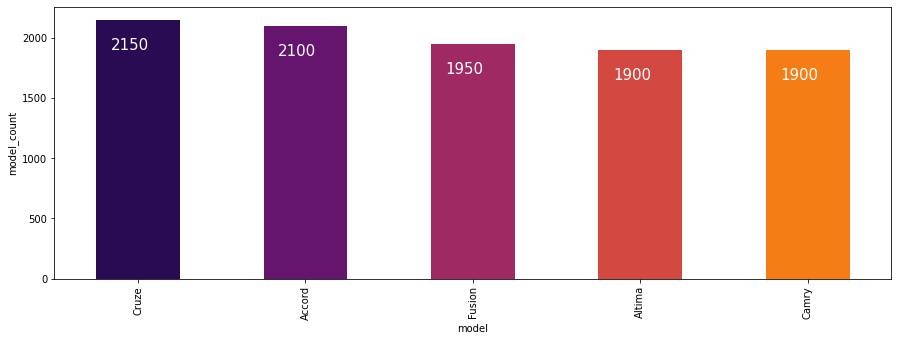

In [1012]:
sns.color_palette("inferno")
model_cnt1 = model_cnt.plot(kind = "bar", x = "model", figsize=(15, 5), color = color)
plt.xlabel("model")
plt.ylabel("model_count")

for i in model_cnt1.patches:
    model_cnt1.annotate(f'\n{i.get_height()}', (i.get_x()+0.2, i.get_height()), ha = "center", va = "top", size = 15, color = "white")

In [1013]:
data.head()

,make,model,year,mileage,price,color,state,date,day,month
0,Chevrolet,Cruze,2023,99157,37488,white,TX,2023-09-26,26,9
1,Toyota,Cruze,2023,19882,34176,red,IL,2023-08-08,8,8
2,Chevrolet,Altima,2023,77718,40297,blue,CA,2023-02-25,25,2
3,Nissan,Fusion,2023,83613,43492,silver,TX,2023-04-25,25,4
4,Ford,Cruze,2023,95349,26655,red,NY,2023-12-14,14,12


In [1014]:
x = data.drop(columns = ["price", "date"])

In [1015]:
y = data["price"]

In [1016]:
x.head(1)

,make,model,year,mileage,color,state,day,month
0,Chevrolet,Cruze,2023,99157,white,TX,26,9


In [1017]:
y.head(1)

0    37488
Name: price, dtype: int64

In [1018]:
from sklearn.preprocessing import LabelEncoder

In [1019]:
enc = LabelEncoder()

x["make"] = enc.fit_transform(x["make"])
x["model"] = enc.fit_transform(x["model"])
x["color"] = enc.fit_transform(x["color"])
x["state"] = enc.fit_transform(x["state"])

In [1020]:
x.head()

,make,model,year,mileage,color,state,day,month
0,0,3,2023,99157,4,4,26,9
1,4,3,2023,19882,2,2,8,8
2,0,1,2023,77718,1,0,25,2
3,3,4,2023,83613,3,4,25,4
4,1,3,2023,95349,2,3,14,12


In [1021]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [1022]:
from sklearn.linear_model import Ridge

In [1023]:
rid = Ridge(alpha=0.6)

In [1024]:
rid.fit(xtrain, ytrain)

Ridge(alpha=0.6)

In [1025]:
model = rid.predict(xtest).round()

In [1026]:
model.shape

(2000,)

In [1027]:
compare_model = pd.DataFrame({"actual_value" : ytest, "Predicted_value" : model})


In [1029]:
compare_model.round()

,actual_value,Predicted_value
6252,15820,28097.0
4684,10539,29469.0
1731,10247,27275.0
4742,25712,27812.0
4521,22564,29172.0
...,...,...
6412,17576,29621.0
8285,45530,30019.0
7853,49199,27304.0
1095,40216,30095.0
